This demonstrates how to use Polynomial2D(). Our first example is to use Polynomial2D().test() to simulate an example. Second, we use a read data set.

# 1. Polynomial2D().test()

In [1]:
##############################
# to import Polynomial2D()
from polynomial2d.polynomial2d import Polynomial2D
##############################

In [2]:
import matplotlib.pyplot as plt
import copy

In [3]:
obj = Polynomial2D()
obj.data,obj.model
# calling Polynomial2D() construction a template.

({'X1': None, 'X2': None, 'Y': None, 'MASK': None},
 {'NORDER': None, 'COEF': None, 'YFIT': None, 'MASKFIT': None})

In [4]:
obj.test(nsize=10,norder=1) # test() to simulate x1,x2,coef
obj.compute() # to compute obj.model['YFIT']
obj.data,obj.model


({'X1': array([ 0.76971112,  0.19029768, -0.25737659, -0.52104013,  0.73398179,
          0.07553305, -0.13067064,  0.96951122,  0.41773016,  0.88526278]),
  'X2': array([ 0.23481852,  0.34015814, -0.70428498,  0.86939999, -0.62535455,
          0.67422995, -0.94696991, -0.9772969 ,  0.99134502,  0.61603314]),
  'Y': None,
  'MASK': array([False, False, False, False, False, False, False, False, False,
         False])},
 {'NORDER': 1,
  'COEF': {(0, 0): -0.26232831801462697,
   (1, 0): -0.08680118282085125,
   (0, 1): 0.851897003477915},
  'YFIT': array([-0.12909896,  0.01093332, -0.83996599,  0.52353783, -0.85877647,
          0.3054898 , -1.05770678, -1.17903934,  0.54593606,  0.18562661]),
  'MASKFIT': None})

In [5]:
# next we demonstrate usint fit()
testobj = copy.deepcopy(obj)
testobj.data['Y'] = testobj.model['YFIT'].copy()
testobj.model['YFIT'] = None
testobj.model['COEF'] = None
testobj.data,testobj.model

({'X1': array([ 0.76971112,  0.19029768, -0.25737659, -0.52104013,  0.73398179,
          0.07553305, -0.13067064,  0.96951122,  0.41773016,  0.88526278]),
  'X2': array([ 0.23481852,  0.34015814, -0.70428498,  0.86939999, -0.62535455,
          0.67422995, -0.94696991, -0.9772969 ,  0.99134502,  0.61603314]),
  'Y': array([-0.12909896,  0.01093332, -0.83996599,  0.52353783, -0.85877647,
          0.3054898 , -1.05770678, -1.17903934,  0.54593606,  0.18562661]),
  'MASK': array([False, False, False, False, False, False, False, False, False,
         False])},
 {'NORDER': 1, 'COEF': None, 'YFIT': None, 'MASKFIT': None})

In [6]:
# fit()
testobj.model['NORDER'] = 1
testobj.fit()
testobj.model['COEF'],obj.model['COEF']
# compare that fitted coefs are correct.

##########
##########
Iteration 1



({(0, 0): -0.26232831801462686,
  (1, 0): -0.08680118282085132,
  (0, 1): 0.8518970034779147},
 {(0, 0): -0.26232831801462697,
  (1, 0): -0.08680118282085125,
  (0, 1): 0.851897003477915})

# 2. Demonstrate with a real data

We use idlk04bcq_flt.fits downloaded from MAST. This is a grism image. Our objective here is to estimate the background underneath an object around pixX = [500:675], pixY = [530,560].

We provide some parameters here.

In [7]:
xref,yref = 488,542
bb0x,bb0y = 502,534
bb1x,bb1y = 684,553
padxleft,xwidth,padxright = 5,int(bb1x-xref),5
padylow,halfdy,padyup = 10,3,15

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from astropy.io import fits
import os
cwd = os.getcwd()

(529.0, 560.0)

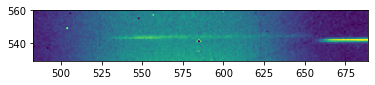

In [9]:
filename = './idlk04bcq_flt.fits'
os.chdir(cwd)
tmp = fits.open(filename)
tmpdata = tmp[1].data.copy()
m = np.where(np.isfinite(tmpdata))
vmin,vmax = np.percentile(tmpdata[m],5.),np.percentile(tmpdata[m],99.)
plt.imshow(tmpdata,origin='lower',cmap='viridis',vmin=vmin,vmax=vmax)
plt.xlim(xref-padxleft,xref+xwidth+padxright)
plt.ylim(yref-halfdy-padylow,yref+halfdy+padyup)


In [10]:
# keep the section in Polynomial2D()
obj = Polynomial2D()
##########
# create 2D x1,x2 grids
tmpx = int(xref-padxleft)
tmppx = int(xref+xwidth+padxright)
x1 = np.arange(tmpx,tmppx)

tmpy = int(yref-halfdy-padylow)
tmppy = int(1+yref+halfdy+padyup)
x2 = np.arange(tmpy,tmppy)

x1,x2 = np.meshgrid(x1,x2)

obj.data['X1'] = x1.copy()
obj.data['X2'] = x2.copy()
##########
# cut the image for y
tmp = fits.open(filename)
tmpdata = tmp[1].data.copy()
obj.data['Y'] = tmpdata[tmpy:tmppy,tmpx:tmppx]
##########
# cut the data quality 'DQ' as mask
tmpdq = tmp['DQ'].data.copy()
tmp = np.full_like(tmpdq,True,dtype=bool)
m = np.where(tmpdq==0)
tmp[m] = False
obj.data['MASK'] = tmp[tmpy:tmppy,tmpx:tmppx]


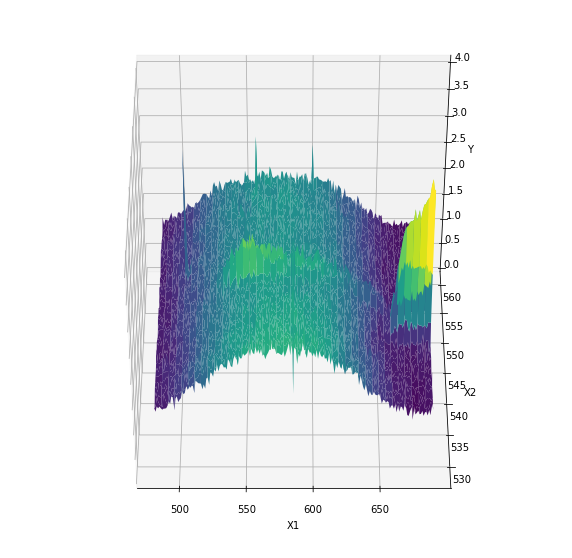

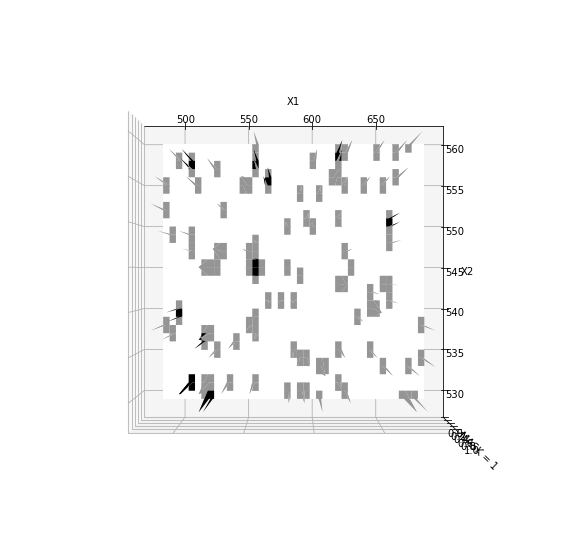

In [11]:
# 3D plots of y and mask (= 0 for good data)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
tmp = copy.deepcopy(obj.data)
ax.plot_surface(tmp['X1'],tmp['X2'],tmp['Y'],
                cmap='viridis'
               )
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(45,-90)



fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
tmp = copy.deepcopy(obj.data)
ax.plot_surface(tmp['X1'],tmp['X2'],tmp['MASK'].astype(int),
                cmap='Greys'
               )
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('MASK = 1')
ax.view_init(90,-90)


In [12]:
# fit()
obj.model['NORDER'] = 4
obj.fit()
obj.compute()

##########
##########
Iteration 1



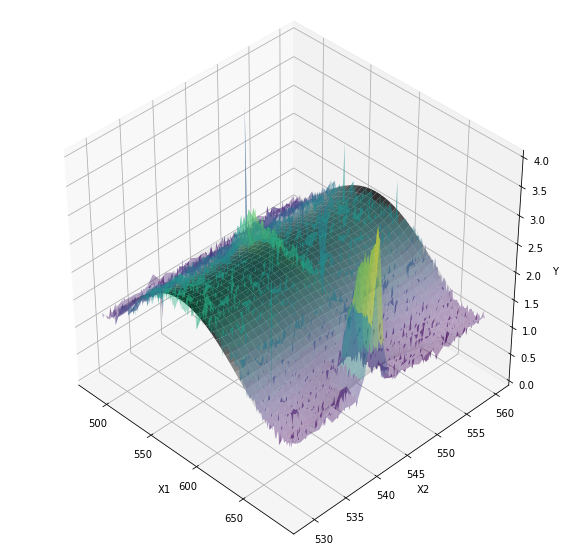

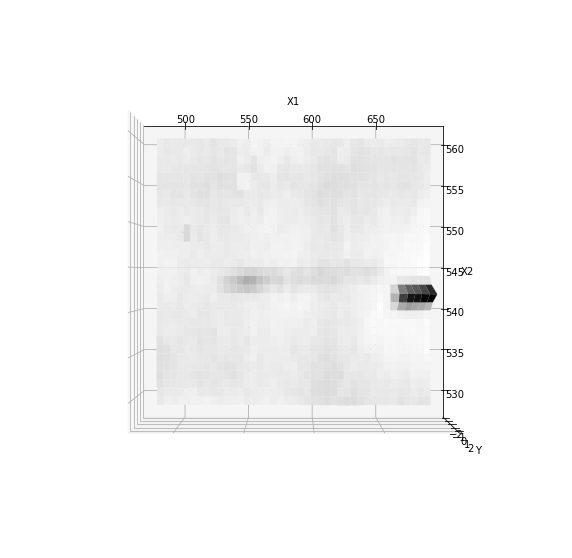

In [13]:
# 3D plots of y and yfit
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
tmp = copy.deepcopy(obj.data)
ax.plot_surface(tmp['X1'],tmp['X2'],tmp['Y'],
                cmap='viridis',alpha=0.4
               )
ax.plot_surface(tmp['X1'],tmp['X2'],obj.model['YFIT'],
                cmap='Greys'
               )
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(40,-45)


# 3D plots of y - yfit
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
tmp = copy.deepcopy(obj.data)
ax.plot_surface(tmp['X1'],tmp['X2'],tmp['Y'] - obj.model['YFIT'],
                cmap='Greys'
               )

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(90,-90)
